# Computer vision with PyTorch

## 01. Computer viosion libraries

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computervision models that you can leverae for your own problems
* `torchvision.transforms` - Functions for manipulating your vision data(images) to bea suitable for use with an ML model.
* `torch.utls.data.Dataset` - Base data class for PyTorch.
* `torch.utils.data.Dataloader`  - Creates a Python iterable over a dataset

In [112]:
# Import pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt


# Check versions
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


## 02. Geting a dataset

we will be using Fashion MNIST dataset

In [172]:
from torch.utils.data.dataset import T
# Setup training daata

train_data = datasets.FashionMNIST(
    root = 'data', # where to download the data
    train = True, # Where do we want the training dataset
    download = True, # do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), # How we want to transform the data
    target_transform = None # how do we want to trainsform the labels
)

test_data = datasets.FashionMNIST(
    root = 'data', # where to download the data
    train = False, # Where do we want the training dataset
    download = True, # do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), # How we want to transform the data
    target_transform = None # how do we want to trainsform the labels
)


In [114]:
len(train_data), len(test_data)

(60000, 10000)

In [115]:
# See train data
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [116]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [117]:
class_names_idx = train_data.class_to_idx
class_names_idx 

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [118]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [119]:
print(f"Image shape: {image.shape}  -> [Color_channels, height, width]")
print(f"Image label: {class_names[label]}  ")

Image shape: torch.Size([1, 28, 28])  -> [Color_channels, height, width]
Image label: Ankle boot  


### 1.2 Visualizing data

Text(0.5, 1.0, '9')

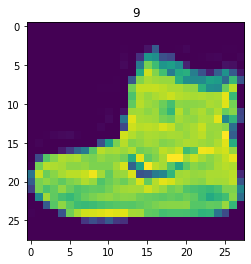

In [120]:
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

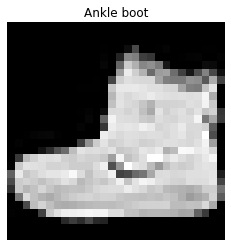

In [121]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

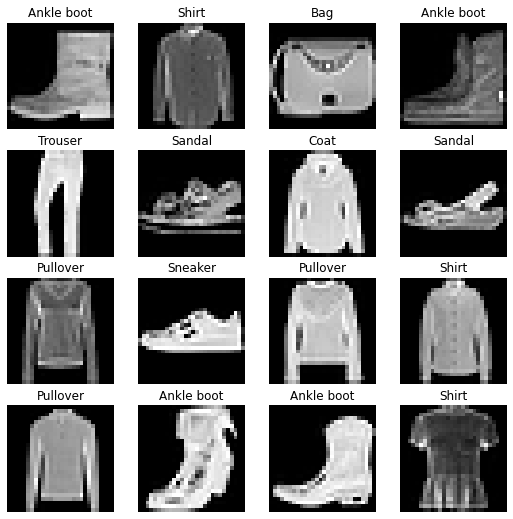

In [122]:
# Plot more images 
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Here do we need linear lines or non linear lines

## 03. Prepare DataLoader

data currently in a form of pytorch datasets

DataLoder turns our dataset into a python iterable


Data has to be turned into batches or mini batches

why? 
1. It is computationally efficient, as in, our computing hardware may not be able to loos (store in memory) at 6000 images in one hit. So it has to be break down to small batches
2. It gives our nn more chances to update its gradients per epoch 

In [123]:
from torch.utils.data import DataLoader


# Setup the batch size hyper paramters
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data, 
                               batch_size = BATCH_SIZE,
                               shuffle = True)


test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f73f842f880>,
 <torch.utils.data.dataloader.DataLoader at 0x7f73f842f3d0>)

In [124]:
# Let's checkout what we have created
print(f"DataLoader : {train_dataloader,test_dataloader} ")
print(f"Length of train_dataloader :{len(train_dataloader)} batches of {BATCH_SIZE} ")
print(f"Length of test_dataloader :{len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoader : (<torch.utils.data.dataloader.DataLoader object at 0x7f73f842f880>, <torch.utils.data.dataloader.DataLoader object at 0x7f73f842f3d0>) 
Length of train_dataloader :1875 batches of 32 
Length of test_dataloader :313 batches of 32


In [125]:
#Check out what's inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [126]:
len(train_features_batch)

32

Image  size: torch.Size([1, 28, 28]) label : 8  label size : torch.Size([])


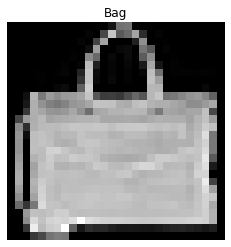

In [127]:
# Show a sample

# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

print(f"Image  size: {img.shape} label : {label}  label size : { label.shape}")

## 03. Model 0: Build a base line model


When starting to build a series of machine learning modeling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve with subsequent models/experiments

Starts simple and add complexity when necessary

In [128]:
# Create a flatten layer
flatten_model = nn.Flatten()


# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happend
print(f"Shape before flattening : {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening : {output.shape} -> [color_chanels, height*width")

Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening : torch.Size([1, 784]) -> [color_chanels, height*width


In [129]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
        
    )


  def forward(self, x):
    return self.layer_stack(x)

In [130]:
torch.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784,
    hidden_units = 10,
    output_shape = len(class_names)
).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [131]:
dummy_x = torch.rand([1,1,28,28]).to(device)
model_0(dummy_x)

tensor([[ 0.2826,  0.0491, -0.0742, -0.1099, -0.0071,  0.1045, -0.3287,  0.0522,
          0.3119, -0.3001]], grad_fn=<AddmmBackward0>)

In [132]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 setup loss, optimizer and evaluation metrics

* Loss function `nn.CrossEntrophy()`
* Optimizer `torch.optim.SGD)`
* Evaluation metric `Accuracy`

In [133]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  return (correct/len(y_pred))*100

In [134]:
import requests
from pathlib import Path

# Download helper functions from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_function.py already exists, skiping download")
else:
  print("Downlading helper function")
  request  = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f :
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_function.py already exists, skiping download


In [135]:
# Loss/optimizer function 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a Function to time our experiments


1. Model's performance
2. How fast it is?

In [136]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device: torch.device=None):
  """Prints difference between start and time."""
  total_time = end-start
  print(f"Train time on {device} : {total_time:.3f} seconds")

  return total_time

In [137]:
start_time = timer()

end_time = timer()

print_train_time(start = start_time, end=end_time, device="cpu")

Train time on cpu : 0.000 seconds


5.253200015431503e-05

### 3.3 Creating training loop and testing loop

1. loop through epochs
2. loop through training batches, perform training steps, calculate the train loss per batch
3. loop through testing batches, perform training steps, calculate the train loss per batch
4. Print out what's happening
5. Time it all

In [138]:
# Import tqdm for progress bar

from tqdm.auto import tqdm
# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3


# Create training and test loop

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} -----------")

  # Training
  train_loss = 0
  model_0.train()
  for batch, (X,y) in enumerate(train_dataloader):
  
    X,y = X.to(device),y.to(device)
    # forward pass
    y_pred = model_0(X)

    # Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    #Print out what's happening
    if(batch%400 ==0):
      print(f"Looked at {batch*len(X)} / {len(train_dataloader.dataset)} samples")

  # Devide total train loss by length of train data_loader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      X,y = X.to(device),y.to(device)
      
      test_pred = model_0(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test scc average per batch
    test_acc /= len(test_dataloader)

  print(f"Train loss : {train_loss:.4f}     Test loss: {test_loss:.4f}    Test accuracy : {test_acc:.4f}")

  train_time_end_on_cpu = timer()

  total_train_time_on_cpu  = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device = str(next(model_0.parameters())))





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 -----------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss : 0.6355     Test loss: 0.5304    Test accuracy : 80.7907
Train time on Parameter containing:
tensor([[ 0.0273,  0.0295, -0.0098,  ...,  0.0039,  0.0191,  0.0135],
        [-0.0188, -0.0357,  0.0164,  ..., -0.0165, -0.0033,  0.0101],
        [-0.0008,  0.0015,  0.0033,  ...,  0.0166, -0.0085,  0.0070],
        ...,
        [-0.0116,  0.0270, -0.0352,  ..., -0.0025,  0.0175, -0.0025],
        [-0.0230,  0.0258,  0.0294,  ...,  0.0204,  0.0088,  0.0012],
        [ 0.0176, -0.0147,  0.0045,  ..., -0.0530, -0.0303,  0.0190]],
       requires_grad=True) : 9.981 seconds
Epoch: 1 -----------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss : 0.4999     Test loss: 0.4911    Test accuracy : 82.

In [139]:
next(model_0.parameters()).device

device(type='cpu')

## 04. Make predictions and get Model 0 results


In [140]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn,
               accuracy_fn):
  """ Return a dictionary containing the results of model predicting on data_loader. """

  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:
      X,y = X.to(device),y.to(device)

      # Make predictions
      y_pred = model(X)

      #Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {"model_name": model.__class__.__name__,
         "model_loss" : loss.item(),
         "model_accuracy" : acc}


model_0_results = eval_model(model = model_0,
                            dataloader = test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.49889200925827026,
 'model_accuracy': 82.85742811501598}

## 5. device agnostic code 

In [141]:

device = "cuda" if torch.cuda.is_available() else "cpu"


## 06 Model 1: Building a better model with non -linearity

In [142]:
# Create a model with non-linear and linear layers
class FashionMNISTV1(nn.Module):

  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        # nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [143]:
from torchvision.datasets.mnist import FashionMNIST
# Create an instanc of model_1
torch.manual_seed(42)
model_1 = FashionMNISTV1(input_shape=784, hidden_units=10, output_shape = len(class_names)).to(device)

In [144]:
model_1

FashionMNISTV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [145]:
from torch.optim.optimizer import Optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr=0.1)

### 6.1 Functionizing training and testing

trainig_loop  - `train_step`

testing_loop - `test_step`

In [146]:

from tqdm.auto import tqdm
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device):
  """ Perform a training with model trying to learn data_loader"""



    # Training mode 
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X,y) in enumerate(data_loader):
    

    X,y = X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # Calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, 
                              y_pred=y_pred.argmax(dim=1))

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

    #Print out what's happening
    if(batch%400 ==0):
      print(f"Looked at {batch*len(X)} / {len(data_loader.dataset)} samples")

  # Devide total train loss by length of train data_loader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss : {train_loss:.4f}     Train accuracy : {train_acc:.4f}")



In [147]:
def test_step(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device):
  """ Performs a testing loop step on model going over data_loader"""

  test_loss, test_acc = 0, 0

  # Put the model in eval model
  model.eval()

  with torch.inference_mode():
    for  (X,y) in data_loader:
      X,y = X.to(device),y.to(device)


      # Send the data to the target device

      # 1. Forward pass(outputs raw objects)
      test_pred = model(X)

      # 2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred = test_pred.argmax(dim=1))

    test_acc /= len(data_loader)
    test_loss /= len(data_loader)

    print(f"Test loss : {test_loss:.4f}     Test accuracy : {test_acc:.4f}")


In [148]:
loss_fn

CrossEntropyLoss()

In [149]:
torch.manual_seed(42)

# Measure time 
from timeit import default_timer as timer
train_time_start_on_GPU = timer()


# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} ------------------")
  print(model_1.state_dict())
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn= loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device  = device)
  
  test_step(model = model_1,
             data_loader = test_dataloader,
             loss_fn= loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device  = device)
  
train_time_end_on_GPU = timer()

total_train_time_model_1_on_cpu = print_train_time(start = train_time_start_on_GPU,
                 end = train_time_end_on_GPU,
                 device = device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 ------------------
OrderedDict([('layer_stack.1.weight', tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])), ('layer_stack.1.bias', tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
         0.0018,  0.0163])), ('layer_stack.2.weight', tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
          0.2019,  0.2847],
        [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.0118,
          0.0932, -0.1864],
        [ 0.2488,  0.1500,  0.1907,  0.1457, -0.3050, -0.0580,  0.1643,  0.1565,
         -0.2877, -0.1792],
        [ 0.23

In [150]:
model_1_results = eval_model(model = model_1,
                             dataloader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn
                            )
model_1_results

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.47663894295692444,
 'model_accuracy': 83.42651757188499}

## 07 Model 2 : Building a Convolutional Neural Network(CNN)

CNN's are known for their capbabilities to find patterns in visual data

In [151]:
# Create a convolutional nn

class FashionMNISTModelV2(nn.Module):
  """ 
  Model architecture that replicateds the TinyVGG
  model from CNN explianer website
  """


  def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
    super().__init__()
    self.Conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyper parametes
    
      nn.ReLU(),
      nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size = 2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyper parametes
    
      nn.ReLU(),
      nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride=1,
                  padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size = 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )


  def forward(self,x):
    x = self.Conv_block_1(x)
    # print("Output shape of conv_block_1", x.shape)
    x = self.conv_block_2(x)
    # print("Output shape of conv_block_2",x.shape)
    x = self.classifier(x)
    # print("Output shape of classifier",x.shape)

    return x






In [152]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape =1 , output_shape = len(class_names), hidden_units =10).to(device)

### 7.1 stepping through `nn.Conv2d`

In [153]:
torch.manual_seed(42)

# Create a bratch of images

images = torch.randn(size=(32,3,64,64))

print(f"Image batch shape: {images.shape} ")
print(f"dingle image shape: {images[0].shape} ")

Image batch shape: torch.Size([32, 3, 64, 64]) 
dingle image shape: torch.Size([3, 64, 64]) 


In [154]:
# Create a single conv2d layer

conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size =3,
                       stride = 1,
                       padding = 1
                       )


# Pass the data through the convolutioanal layer
conv_output = conv_layer(images[0].unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

### 7.1 stepping through `nn.MaxPool2d`

In [155]:
# Create a sample Maxpools2d later
max_pool_layer = nn.MaxPool2d(kernel_size = 5)

test_image_through_conv = conv_layer(images[0].unsqueeze(dim=0))
print(f"Shape after going through conv_layer() : {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)

print(f"Shape after going through conv_layer and max pool later : {test_image_through_conv_and_max_pool.shape}")

Shape after going through conv_layer() : torch.Size([1, 10, 64, 64])
Shape after going through conv_layer and max pool later : torch.Size([1, 10, 12, 12])


In [156]:
random_tensor = torch.randn(size =(1,1,2,2))

# Create a max pool layer
max_pool = nn.MaxPool2d(kernel_size = 2)

max_pool_tensor = max_pool(random_tensor)

print(f"Max pool tesnor : {max_pool_tensor}")
print(f"Max pool tensor  shape : {max_pool_tensor.shape}")
print(f"random_tensor : {random_tensor}")

Max pool tesnor : tensor([[[[0.5534]]]])
Max pool tensor  shape : torch.Size([1, 1, 1, 1])
random_tensor : tensor([[[[0.4963, 0.0045],
          [0.5534, 0.1379]]]])


In [157]:
random_image_tensor = torch.randn(size =(1,1,28,28))
model_2(random_image_tensor)

tensor([[ 0.0338, -0.0919,  0.0639, -0.0353,  0.0078,  0.0246,  0.0213,  0.0064,
         -0.0107, -0.0162]], grad_fn=<AddmmBackward0>)

### 7.3 Setup loss function and optimizer for `model_2`

In [158]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [159]:
model_2.state_dict()

OrderedDict([('Conv_block_1.0.weight', tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
                    

### 7.4 Training and Testing `model_2` Using our training and test functions

In [160]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Meature time
from timeit import default_timer as timer

train_time_start_model_2 = timer()


# Train and test model

epochs = 3 


for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}      -----------------------------")
  train_step(model=model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn= accuracy_fn,
             device = device)
  
  train_step(model=model_2,
             data_loader = test_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn= accuracy_fn,
             device = device)
  
train_time_end_model_2 = timer()

total_train_time_model_2_on_cpu = print_train_time(start = train_time_start_model_2, end = train_time_end_model_2,device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0      -----------------------------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss : 1.0378     Train accuracy : 62.3517
Looked at 0 / 10000 samples
Train loss : 0.6392     Train accuracy : 76.4976
Epoch: 1      -----------------------------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss : 0.5271     Train accuracy : 80.7867
Looked at 0 / 10000 samples
Train loss : 0.4930     Train accuracy : 82.0587
Epoch: 2      -----------------------------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss : 0.4396     Train accuracy : 84.1750
Looked at 0 / 10000 samples
Train loss : 0.4398     Train accuracy : 84.1454
Train time on cpu : 25

### 7.5 Evaluating `model_2`

In [161]:
model_2_results = eval_model(
    model = model_2,
    dataloader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.5057083964347839,
 'model_accuracy': 80.23162939297124}

## 8. Compare model results and training time

In [162]:


import pandas as pd

compare_results = pd.DataFrame([model_0_results,model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.498892,82.857428
1,FashionMNISTV1,0.476639,83.426518
2,FashionMNISTModelV2,0.505708,80.231629


In [163]:
# Add training time to results comparision

compare_results["Toral train time"] = [total_train_time_on_cpu,total_train_time_model_1_on_cpu,total_train_time_model_2_on_cpu]

compare_results

,model_name,model_loss,model_accuracy,Toral train time
0,FashionMNISTModelV0,0.498892,82.857428,30.788498
1,FashionMNISTV1,0.476639,83.426518,48.228911
2,FashionMNISTModelV2,0.505708,80.231629,258.456095


Text(0, 0.5, 'model')

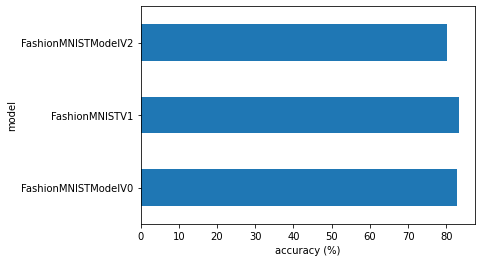

In [164]:
# Visulaize our model results
compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")


## 9. Make and evaluate random predictions with best model

In [191]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample,dim=0).to(device)

      #Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probabilites)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      #Get pred_prep off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_pobs to turn list into tensor
  return torch.stack(pred_probs)

In [205]:
import random
# random.seed(42)

test_samples = []
test_label =  []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_label.append(label)

len(test_samples)

9

Text(0.5, 1.0, '2')

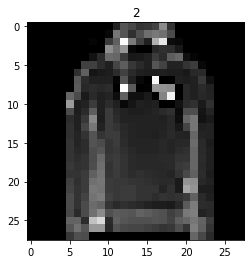

In [206]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(test_label[0])

In [207]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                             data = test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[3.4932e-02, 1.3645e-02, 2.0807e-01, 3.6764e-02, 4.5414e-01, 1.7662e-04,
         2.1554e-01, 7.5548e-06, 3.6702e-02, 1.5504e-05],
        [1.9209e-05, 1.8752e-05, 1.9532e-02, 3.0115e-04, 9.5009e-01, 1.7412e-09,
         2.6943e-02, 9.4392e-11, 3.0987e-03, 1.6858e-09]])

In [208]:
# Covert prediction pribabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 4, 6, 3, 2, 6, 0, 1, 1])

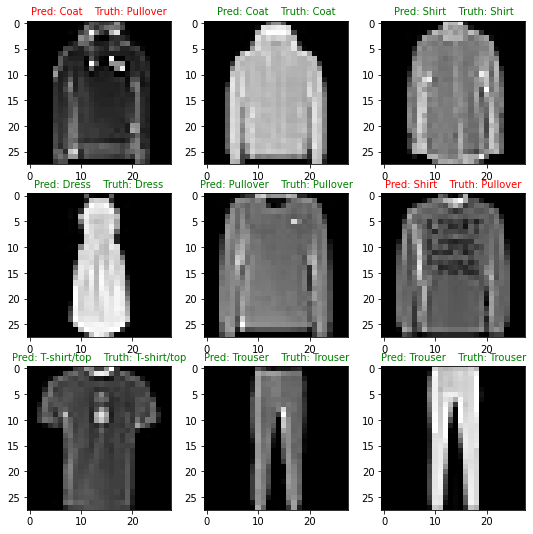

In [209]:
plt.figure(figsize=(9,9))

nrows= 3
ncols= 3

for i, sample in enumerate(test_samples):
  #Caculate sublot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")

  # Find the prediction (in text form )
  pred_label = class_names[pred_classes[i]]

  # Get the truth label
  truth_label = class_names[test_label[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label}    Truth: {truth_label}"

  # Check for equality between pred and truth and chamge color of title text

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")

  else:
    plt.title(title_text, fontsize=10, c="r")




## 10. Making a confusion matrix for further prediction evaluations


1. Make predictions with out trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfustionMatrix`
3. plot the confusion matrix using `mixtend.ploting.plot_confusion_matrix()`

In [213]:



# 1. Make predictions with trained model

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc = "Making predictions..."):
    #Send the data and targets to target device
    X, y = X.to(device), y.to(device)

    #Do the forward pass
    y_logit = model_2(X)

    #Turn predictions from logits 
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    #Put prediction on CPU for wvaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of preductions into a tensor
print(y_preds)
y_pred_tensor = torch.cat(y_preds)

y_pred_tensor[:10]


  

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 3, 2, 6, 8, 0, 2, 7, 7, 5,
        3, 2, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 7, 4, 7, 2, 3, 4, 6, 2, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 3, 4, 3, 3, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([0, 1, 6, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 6, 8, 4]), tensor([1, 5, 4, 3, 5, 1, 8, 4, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 6, 2,
        3, 3, 5, 2, 4, 7, 9, 3]), tensor([7, 2, 3, 5, 0, 9, 2, 7, 4, 2, 0, 5, 6, 1, 2, 1, 3, 6, 9, 1, 0, 7, 3, 8,
        7, 9, 5, 4, 4, 7, 3, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 3, 8, 4, 1, 3,
        0, 6, 7, 2, 8, 5, 3, 0]), tensor([7, 7, 3, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 3, 9, 2, 2, 8, 6, 4,
        3, 4, 9, 7, 3, 3, 8, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 2, 3, 8, 9, 6, 1, 3, 6, 4, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [214]:
len(y_preds)

313

In [218]:
try:
  import torchmetrics, mlxtend

  print(f"mlxtend version : {mlxtend.__version__}")

  assert int(mlxtend.__version__.split('.')[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except : 
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend

  print(f"mlxtend version : {mlxtend.__version__}")

  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
mlxtend version : 0.21.0


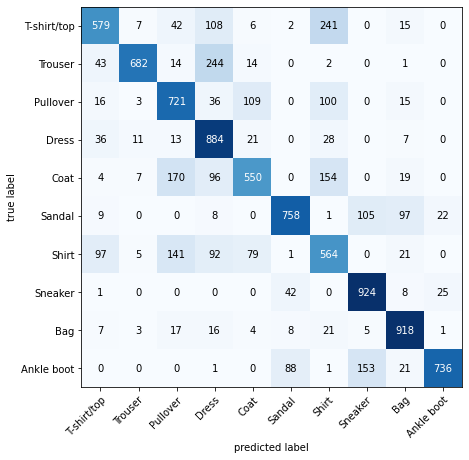

In [223]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

#3. plot the confusin matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

## 11. Save and load best performing model

In [230]:
from pathlib import Path
#Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

#Create model save
MODEL_NAME = "py_torch_computer_vision model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

# Save the model state dict

print(f"Saving model to : {MODEL_SAVE_PATH}")

torch.save(obj=model_2.state_dict(), f = MODEL_SAVE_PATH)




Saving model to : models/py_torch_computer_vision model_2.pth


In [233]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units = 10,
                                     output_shape = len(class_names))

# Loaded in the save state dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (Conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [237]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.5057083964347839,
 'model_accuracy': 80.23162939297124}

In [236]:
#Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    dataloader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.5057083964347839,
 'model_accuracy': 80.23162939297124}

In [239]:
# Check if model results are close to each other

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)